In [202]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [203]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [204]:
import pandas as pd

In [205]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/mr.csv', encoding='unicode_escape', header=0)
#df.drop(['Cleanedreview'],axis=1,inplace=True)
#df.to_csv('mr/train-sst5.csv', index=False)
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('mr/train-mr.csv', index=False)
test.to_csv('mr/test-mr.csv', index=False)

In [206]:
train_df = pd.read_csv("mr/train-mr.csv", encoding='unicode_escape', header=0)

In [207]:
train_df

,sentiment,review
0,1,it is as uncompromising as it is nonjudgmental...
1,1,'this is a harrowing movie about how parents k...
2,1,"maryam is a small film , but it offers large r..."
3,1,there's so much to look at in metropolis you h...
4,1,compellingly watchable .
...,...,...
9427,1,a compelling story of musical passion against ...
9428,0,"in the end , the film feels homogenized and a ..."
9429,0,"'in the end , the movie bogs down in insignifi..."
9430,0,does little more than play an innocuous game o...


In [208]:
train_df.iloc[0][1]

'it is as uncompromising as it is nonjudgmental , and makes clear that a prostitute can be as lonely and needy as any of the clients . '

In [209]:
test_df = pd.read_csv("mr/test-mr.csv", encoding='unicode_escape', header=0)

In [210]:
test_df.shape

(1048, 2)

In [211]:
test_df.head()

,sentiment,review
0,1,superb production values & christian bale's ch...
1,1,ranks among willams' best screen work .
2,1,"'funny , sexy , devastating and incurably roma..."
3,1,'greene delivers a typically solid performance...
4,1,"'a wonderful , ghastly film . '"


In [212]:
test_df

,sentiment,review
0,1,superb production values & christian bale's ch...
1,1,ranks among willams' best screen work .
2,1,"'funny , sexy , devastating and incurably roma..."
3,1,'greene delivers a typically solid performance...
4,1,"'a wonderful , ghastly film . '"
...,...,...
1043,0,what you get with empire is a movie you've see...
1044,0,though it pretends to expose the life of male ...
1045,0,the ill-conceived modern-day ending falls flat...
1046,0,feels like six different movies fighting each ...


In [213]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,1,it is as uncompromising as it is nonjudgmental...
1,1,1,'this is a harrowing movie about how parents k...
2,2,1,"maryam is a small film , but it offers large r..."
3,3,1,there's so much to look at in metropolis you h...
4,4,1,compellingly watchable .


In [214]:
train_df_bert

,id,label,sentence
0,0,1,it is as uncompromising as it is nonjudgmental...
1,1,1,'this is a harrowing movie about how parents k...
2,2,1,"maryam is a small film , but it offers large r..."
3,3,1,there's so much to look at in metropolis you h...
4,4,1,compellingly watchable .
...,...,...,...
9427,9427,1,a compelling story of musical passion against ...
9428,9428,0,"in the end , the film feels homogenized and a ..."
9429,9429,0,"'in the end , the movie bogs down in insignifi..."
9430,9430,0,does little more than play an innocuous game o...


In [215]:
train_df_bert = train_df_bert.iloc[0:10000]

In [216]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,1,superb production values & christian bale's ch...
1,1,1,ranks among willams' best screen work .
2,2,1,"'funny , sexy , devastating and incurably roma..."
3,3,1,'greene delivers a typically solid performance...
4,4,1,"'a wonderful , ghastly film . '"


In [217]:
test_df_bert = test_df_bert.iloc[0:3000]

In [218]:
test_df_bert

,id,label,sentence
0,0,1,superb production values & christian bale's ch...
1,1,1,ranks among willams' best screen work .
2,2,1,"'funny , sexy , devastating and incurably roma..."
3,3,1,'greene delivers a typically solid performance...
4,4,1,"'a wonderful , ghastly film . '"
...,...,...,...
1043,1043,0,what you get with empire is a movie you've see...
1044,1044,0,though it pretends to expose the life of male ...
1045,1045,0,the ill-conceived modern-day ending falls flat...
1046,1046,0,feels like six different movies fighting each ...


In [219]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [220]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [221]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [222]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  'this is a harrowing movie about how parents know where all the buttons are , and how to push them . '
Tokenized:  ["'", 'this', 'is', 'a', 'harrow', '##ing', 'movie', 'about', 'how', 'parents', 'know', 'where', 'all', 'the', 'buttons', 'are', ',', 'and', 'how', 'to', 'push', 'them', '.', "'"]
Token IDs:  [1005, 2023, 2003, 1037, 24560, 2075, 3185, 2055, 2129, 3008, 2113, 2073, 2035, 1996, 11287, 2024, 1010, 1998, 2129, 2000, 5245, 2068, 1012, 1005]


In [223]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:
    #sent=str(sent)

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  81


In [224]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:
    #sent=str(sent)

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  60


In [225]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    #sent=str(sent)
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 60,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  it is as uncompromising as it is nonjudgmental , and makes clear that a prostitute can be as lonely and needy as any of the clients . 
Token IDs: tensor([  101,  2009,  2003,  2004,  4895,  9006, 25013,  2004,  2009,  2003,
         2512,  9103,  2094, 21693, 21050,  1010,  1998,  3084,  3154,  2008,
         1037, 19215,  2064,  2022,  2004,  9479,  1998, 23927,  2004,  2151,
         1997,  1996,  7846,  1012,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [226]:

train_df_bert.head()

,id,label,sentence
0,0,1,it is as uncompromising as it is nonjudgmental...
1,1,1,'this is a harrowing movie about how parents k...
2,2,1,"maryam is a small film , but it offers large r..."
3,3,1,there's so much to look at in metropolis you h...
4,4,1,compellingly watchable .


In [227]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [228]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [229]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (9432, 60)
X_test shape: (1048, 60)


In [230]:
from keras import backend as K
from tensorflow import keras
import tensorflow as tf

class FuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_centers=None,
                 initial_sigmas=None, 
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_centers = initial_centers
        self.initial_sigmas = initial_sigmas
        super(FuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        c_init_values =[]
        
        if self.initial_centers is None:
            c_init_values= tf.random_uniform_initializer(-1, 1)(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            c_init_values =tf.convert_to_tensor(self.initial_centers, dtype="float32")
        self.c = tf.Variable(initial_value= c_init_values, trainable=True)

        a_init_values = []
        if self.initial_sigmas is None:
            a_init_values = tf.ones_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            a_init_values = tf.convert_to_tensor(self.initial_sigmas, dtype="float32")
        self.a = tf.Variable(initial_value= a_init_values, trainable=True)
        super(FuzzyLayer, self).build(input_shape)  

    def call(self, x):
        
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_c = self.c
        aligned_a = self.a
        for dim in self.input_dimensions:
            aligned_c = K.repeat_elements(K.expand_dims(aligned_c, 0), dim, 0)
            aligned_a = K.repeat_elements(K.expand_dims(aligned_a, 0), dim, 0)

        xc = K.exp(-K.sum(K.square((aligned_x - aligned_c) / (2 * aligned_a)), axis=-2, keepdims=False))
        
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)


In [231]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

class DefuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_rules_outcomes=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_rules_outcomes = initial_rules_outcomes
        super(DefuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        outcomes_init_values = []
        if self.initial_rules_outcomes is None:
            outcomes_init_values = tf.random_uniform_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            outcomes_init_values = tf.convert_to_tensor(self.initial_rules_outcomes, dtype="float32")
        
        self.rules_outcome = tf.Variable(initial_value = outcomes_init_values, trainable=True)
        
        super(DefuzzyLayer, self).build(input_shape)  

    def call(self, x):
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_rules_outcome = self.rules_outcome
        for dim in self.input_dimensions:
            aligned_rules_outcome = K.repeat_elements(K.expand_dims(aligned_rules_outcome, 0), dim, 0)
        
        xc = K.sum((aligned_x * aligned_rules_outcome), axis=-2, keepdims=False)
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)
    
    def get_config(self):
        return {"rules_outcome": self.rules_outcome.numpy()}


In [235]:

import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32
nb_classes = 5
filters = 32
kernel_size = 3
hidden_dims = 40

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))

model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 60, 32)            64000     
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 60, 32)            5152      
_________________________________________________________________
dropout_63 (Dropout)         (None, 60, 32)            0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 60, 32)            4128      
_________________________________________________________________
dropout_64 (Dropout)         (None, 60, 32)            0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 60, 32)            3104      
_________________________________________________________________
dropout_65 (Dropout)         (None, 60,

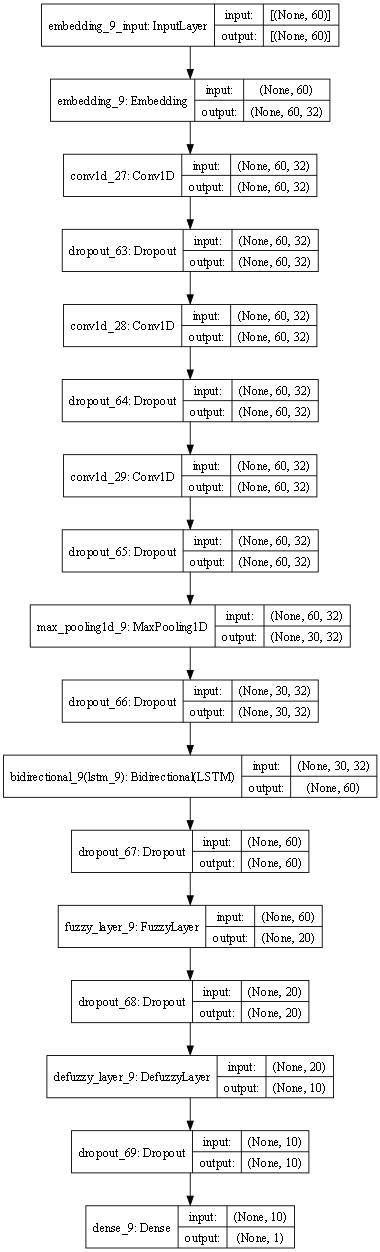

In [236]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [237]:
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20, 
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
849/849 [==============================] - 17s 15ms/step - loss: 0.6885 - accuracy: 0.5191 - val_loss: 0.6591 - val_accuracy: 0.6292
Epoch 2/20
849/849 [==============================] - 12s 14ms/step - loss: 0.5897 - accuracy: 0.7019 - val_loss: 0.6146 - val_accuracy: 0.6939
Epoch 3/20
849/849 [==============================] - 12s 14ms/step - loss: 0.4710 - accuracy: 0.7910 - val_loss: 0.5867 - val_accuracy: 0.7246
Epoch 4/20
849/849 [==============================] - 12s 14ms/step - loss: 0.3930 - accuracy: 0.8399 - val_loss: 0.6185 - val_accuracy: 0.6949
Epoch 5/20
849/849 [==============================] - 12s 14ms/step - loss: 0.3260 - accuracy: 0.8741 - val_loss: 0.6921 - val_accuracy: 0.7034
Epoch 6/20
295/295 [==============================] - 2s 6ms/step - loss: 0.2274 - accuracy: 0.9221
Training Accuracy: 0.922074
Training Loss: 0.227378
33/33 [==============================] - 0s 6ms/step - loss: 0.7298 - accuracy: 0.7357
Testing Accuracy:  0.735687
Testing Loss:

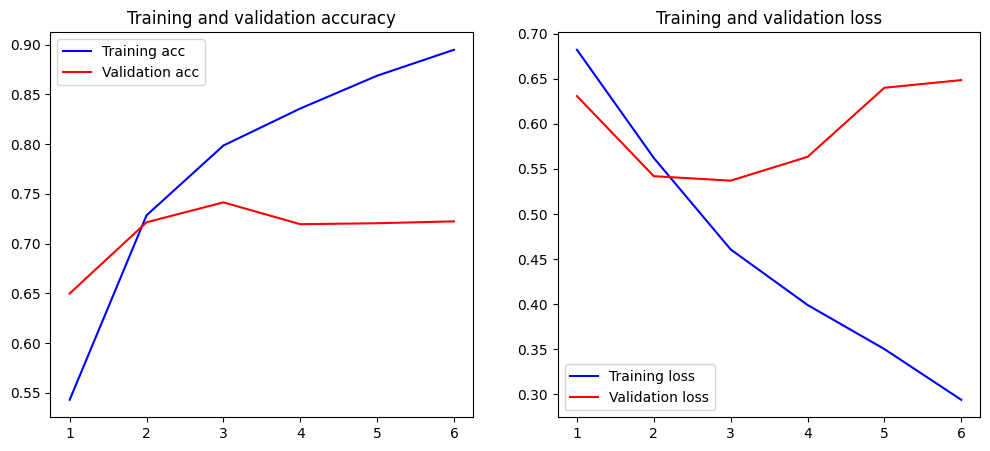

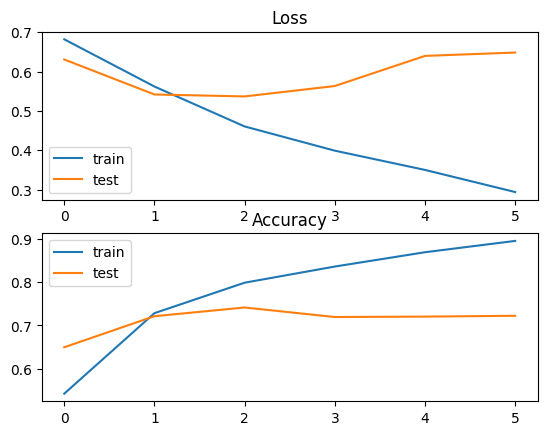

In [139]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()